In [27]:
# Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import torch

**ML problem types:**
Supervised Machine Learning,
Unsupervised Machine Learning,
Reinforcement Learning

Supervised Machine Learning deal with labeled data and can be divided into classification (logistic) and regression

Unsupervised Machine Learning deal with un-labeled data. Examples are clustering and PCA (principal component analysis.

Reinforcement Learning is to train an agent to make the correct decision or act correctly through trial and error, where there is rewards for good results and maybe punishment or less rewards for less satisfactory results

I am mostly interested in learning Supervised Machine Learning

**Regression vs Classification.**

Classification is used to predict categorical labels, eg is this cancer or not cancer? Is this spam or not spam? Is this a cat, dog or a bird?

Regression is used to predict continuous  numerical values, eg the cost of a house depending on the number of rooms and living area (m2), or the coffee yield depending on maybe temperature, altitude and amount of rain.

**Bias-Variance Trade-off.**

Error can come from biass and variance.
Bias is when a model is oversimplified, causing underfitting. The model is too simple to accurately describe the problem.

Variance is when the model is too complex and the model is overfitting to the training-data, thus performing badly on test data.

A simple model has high bias and low variance, while a complex model has low bias and high variance. The goal is to find a balance (tradeoff) that minimized the total error from both bias and variance.

In [34]:
# Import California Housing Dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

print("Dataset shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature names:", california_housing.feature_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mse = sum((y_test-predictions)**2)/len(y_test)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

Dataset shape: (20640, 8)
Target shape: (20640,)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Root Mean Squared Error: 0.7455813830127739


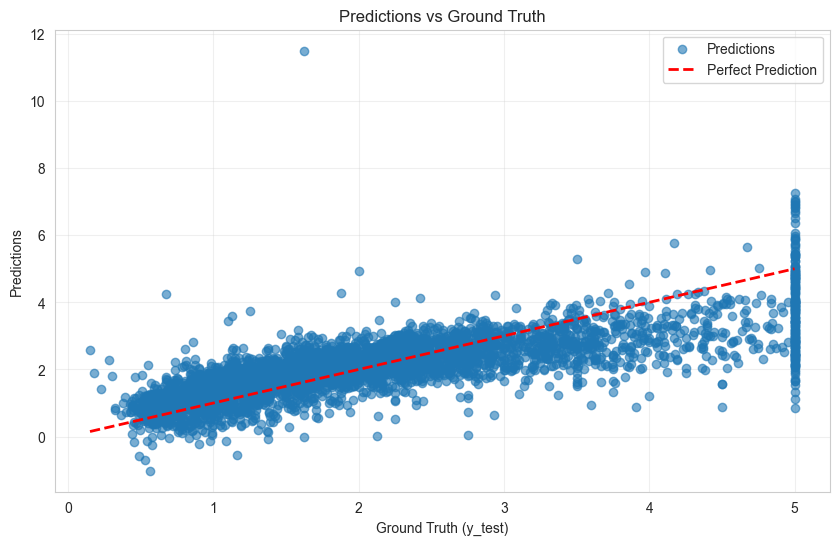

In [35]:
# Plot Predictions vs Ground Truth
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Ground Truth (y_test)')
plt.ylabel('Predictions')
plt.title('Predictions vs Ground Truth')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

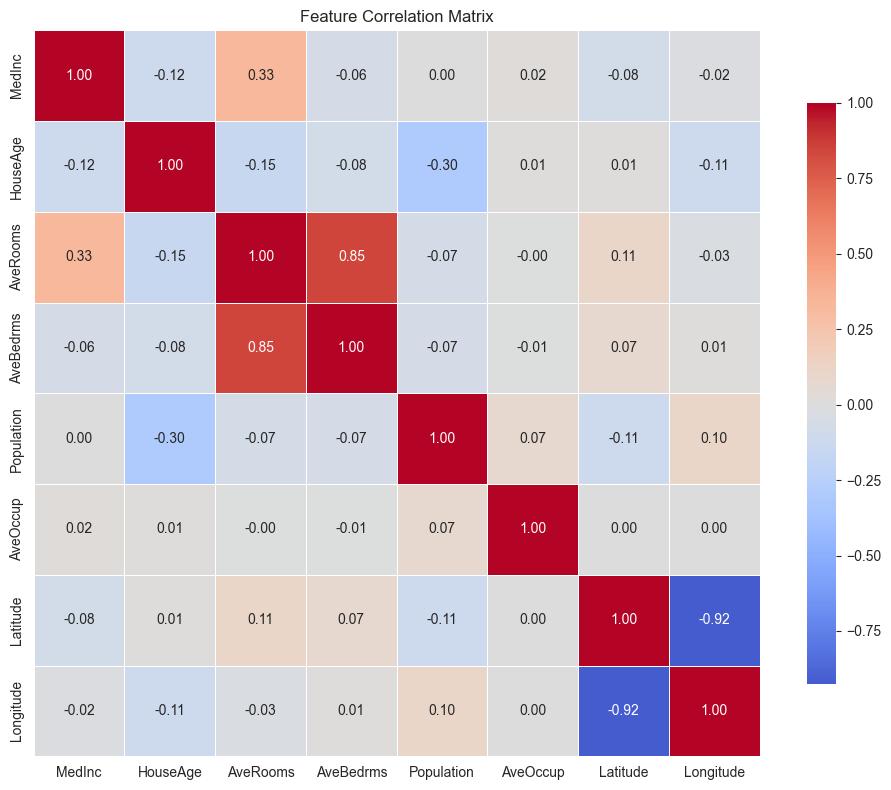

Correlation Matrix:
              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   

            Latitude  Longitude  
MedInc     -0.079809  -0.015176  
HouseAge    0.011173  -0.108197  
AveRooms    0.106389  -0.027540  
AveBedrms   0.069721   0.013344  
Population -0.108785   0.099773  
AveOccup    0.002366   0.002476  
Latitude    1.000000  -0.924664  
Longitude  -0.

In [36]:
# Feature Correlation Analysis
# Create a DataFrame with features for easier correlation calculation
X_df = pd.DataFrame(X, columns=california_housing.feature_names)

# Calculate correlation matrix
correlation_matrix = X_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

**Correlation Matrix**

The correlation matrix above shows that I could likely drop either latitude or longitude without affecting the model much, I could also drop either number of rooms or number of bedrooms as they are also highly correlated.

Model Coefficients (Intercept): -37.023277706063986

Feature Coefficients:
      Feature  Coefficient
3   AveBedrms     0.783145
0      MedInc     0.448675
7   Longitude    -0.433708
6    Latitude    -0.419792
2    AveRooms    -0.123323
1    HouseAge     0.009724
5    AveOccup    -0.003526
4  Population    -0.000002


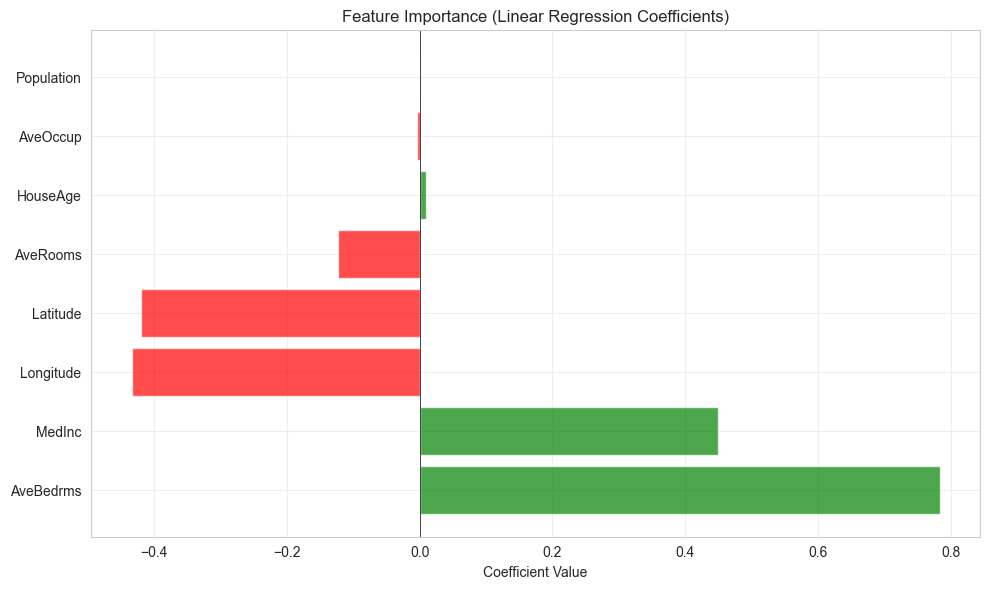

In [37]:
# Feature Importance (Model Coefficients)
# Get coefficients from the linear regression model
coefficients = model.coef_
intercept = model.intercept_

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': california_housing.feature_names,
    'Coefficient': coefficients
})
coef_df = coef_df.sort_values('Coefficient', key=abs, ascending=False)

print("Model Coefficients (Intercept):", intercept)
print("\nFeature Coefficients:")
print(coef_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in coef_df['Coefficient']]
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Impact of features on house-prices**

The graph above shows that the features AveOccup, Population and HouseAge has little impact on house prices and they can thus be dropped

In [38]:
# Simplification - Drop less important features
# Features to drop: Population, AveOccup, HouseAge
features_to_drop = ['Population', 'AveOccup', 'HouseAge']

# Create new feature dataframe by dropping specified features
X_simplified = X_df.drop(columns=features_to_drop)
print("Original features:", X_df.columns.tolist())
print("Simplified features:", X_simplified.columns.tolist())
print(f"\nDropped {len(features_to_drop)} features: {features_to_drop}")
print(f"Reduced from {X_df.shape[1]} to {X_simplified.shape[1]} features")

# Split the simplified dataset
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simplified, y, test_size=0.2, random_state=42)

# Train model with simplified features
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train_simple)
predictions_simple = model_simple.predict(X_test_simple)

# Calculate metrics for simplified model
rmse_simple = np.sqrt(sum((y_test_simple - predictions_simple)**2) / len(y_test_simple))

print("\n--- Simplified Model Performance ---")
print("RMSE:", rmse_simple)
print("\n--- Comparison ---")
print(f"Original RMSE: {rmse:.4f}")
print(f"Simplified RMSE: {rmse_simple:.4f}")

Original features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Simplified features: ['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']

Dropped 3 features: ['Population', 'AveOccup', 'HouseAge']
Reduced from 8 to 5 features

--- Simplified Model Performance ---
RMSE: 0.7528409640011293

--- Comparison ---
Original RMSE: 0.7456
Simplified RMSE: 0.7528


**Clean Dataset**

I also want to clean the dataset, but I wont do that here.
Data cleaning is a step in machine learning (ML) which involves identifying and removing any missing, duplicate or irrelevant data. The goal of data cleaning is to ensure that the data is accurate, consistent and free of errors.

Original features: 8
Polynomial features: 44

--- Polynomial Regression (Degree 2) ---
RMSE: 0.6813967449284705

Top 15 Most Important Features (by absolute coefficient):
                Feature  Coefficient
3             AveBedrms   -38.323120
0                MedInc   -11.936768
6              Latitude     8.284640
2              AveRooms     7.884154
7             Longitude     5.709792
5              AveOccup     1.017431
1              HouseAge    -0.842630
32   AveBedrms Latitude    -0.528063
33  AveBedrms Longitude    -0.486724
29          AveBedrms^2     0.264009
14      MedInc Latitude    -0.163992
15     MedInc Longitude    -0.153483
11     MedInc AveBedrms    -0.145653
27    AveRooms Latitude     0.106560
24   AveRooms AveBedrms    -0.105964


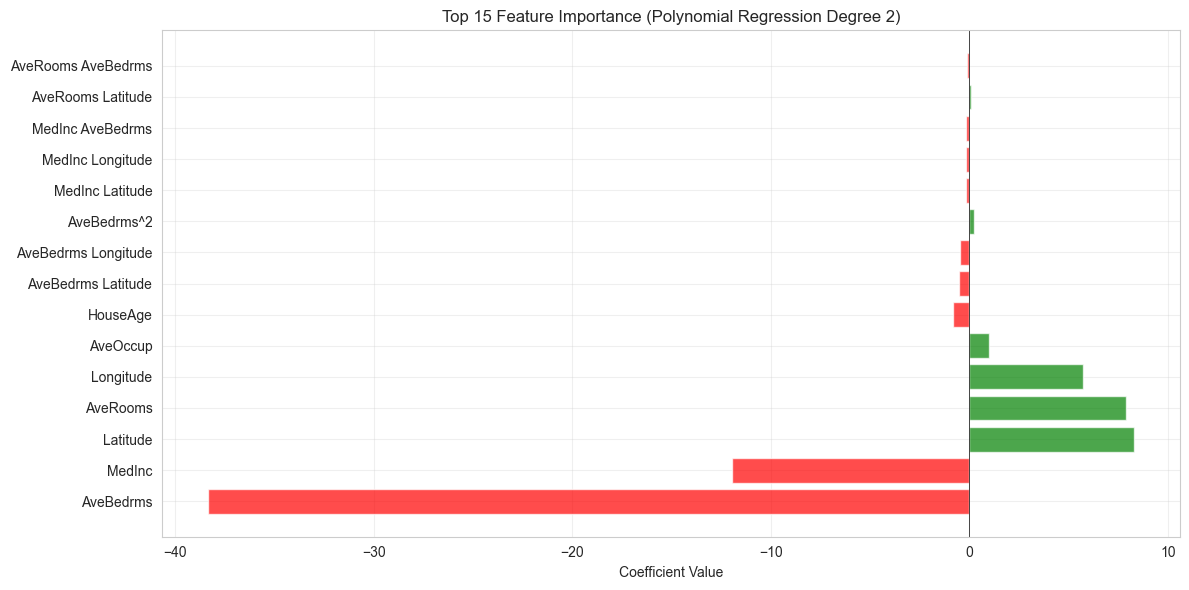

In [39]:
# Polynomial Regression on Cleaned Data with Feature Importance
from sklearn.preprocessing import PolynomialFeatures

# Split data
X_train_pol, X_test_pol, y_train_pol, y_test_pol = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_pol)
X_test_poly = poly.transform(X_test_pol)

print(f"Original features: {X_train_pol.shape[1]}")
print(f"Polynomial features: {X_train_poly.shape[1]}")

# Train polynomial model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_pol)
poly_predictions = poly_model.predict(X_test_poly)

# Calculate metrics
poly_rmse = np.sqrt(sum((y_test_pol - poly_predictions)**2) / len(y_test_pol))
print("\n--- Polynomial Regression (Degree 2) ---")
print("RMSE:", poly_rmse)

# Get feature names and coefficients
feature_names = poly.get_feature_names_out(data_cleaned.drop('Price', axis=1).columns)
coef_poly_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': poly_model.coef_
})
coef_poly_df['Abs_Coefficient'] = coef_poly_df['Coefficient'].abs()
coef_poly_df = coef_poly_df.sort_values('Abs_Coefficient', ascending=False).head(15)

print("\nTop 15 Most Important Features (by absolute coefficient):")
print(coef_poly_df[['Feature', 'Coefficient']])

# Plot top features
plt.figure(figsize=(12, 6))
colors = ['green' if x > 0 else 'red' for x in coef_poly_df['Coefficient']]
plt.barh(coef_poly_df['Feature'], coef_poly_df['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value')
plt.title('Top 15 Feature Importance (Polynomial Regression Degree 2)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

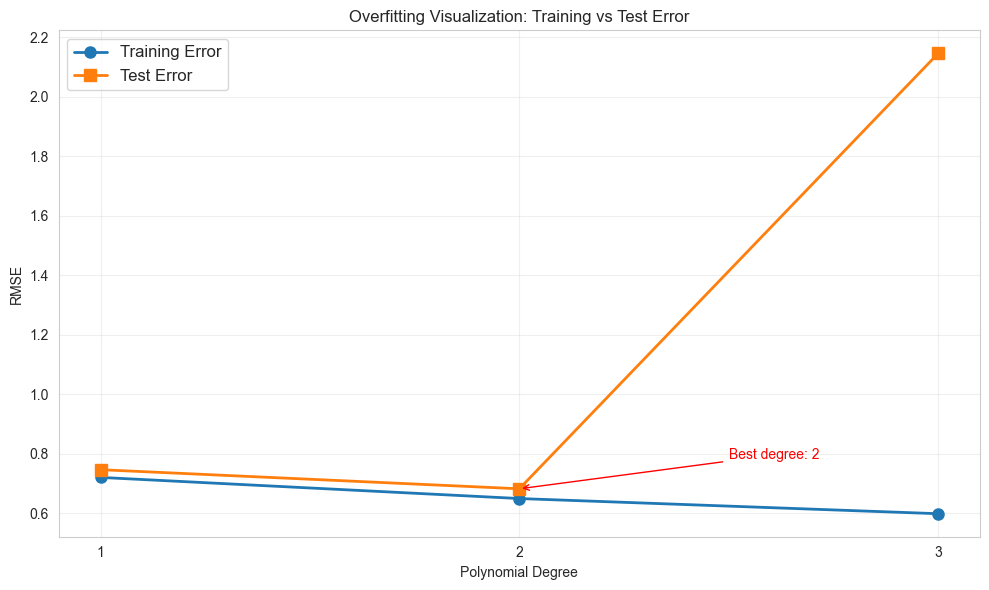

Polynomial Degree | Training RMSE | Test RMSE
---------------------------------------------
        1         |    0.7197     |    0.7456    
        2         |    0.6486     |    0.6814    
        3         |    0.5976     |    2.1451    

Best degree (lowest test error): 2
Best test RMSE: 0.6814


In [41]:
# Overfitting Visualization
# Train models with different polynomial degrees and track training vs test error

degrees = range(1, 4)
train_errors = []
test_errors = []

for degree in degrees:
    # Create polynomial features
    poly_temp = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_temp = poly_temp.fit_transform(X_train)
    X_test_temp = poly_temp.transform(X_test)
    
    # Train model
    model_temp = LinearRegression()
    model_temp.fit(X_train_temp, y_train)
    
    # Calculate errors
    y_train_pred = model_temp.predict(X_train_temp)
    y_test_pred = model_temp.predict(X_test_temp)
    
    train_rmse = np.sqrt(np.mean((y_train - y_train_pred)**2))
    test_rmse = np.sqrt(np.mean((y_test - y_test_pred)**2))
    
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)

# Plot overfitting visualization
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, marker='o', label='Training Error', linewidth=2, markersize=8)
plt.plot(degrees, test_errors, marker='s', label='Test Error', linewidth=2, markersize=8)
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('Overfitting Visualization: Training vs Test Error')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(degrees)

# Annotate the point where overfitting starts
best_degree = np.argmin(test_errors) + 1
plt.annotate(f'Best degree: {best_degree}', 
             xy=(best_degree, test_errors[best_degree-1]),
             xytext=(best_degree+0.5, test_errors[best_degree-1]+0.1),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='red')

plt.tight_layout()
plt.show()

print("Polynomial Degree | Training RMSE | Test RMSE")
print("-" * 45)
for i, degree in enumerate(degrees):
    print(f"{degree:^17} | {train_errors[i]:^13.4f} | {test_errors[i]:^13.4f}")

print(f"\nBest degree (lowest test error): {best_degree}")
print(f"Best test RMSE: {min(test_errors):.4f}")

**Why do regression models fail?**

They can fail due to underfitting, when the model is to simple to accurately describe a problem
They can fail due to overfitting, when the model is very complex and detailed perfectly fitting the training data, but do not fit the test data
They can fail due to data outliers
Or by missing a key variable (this is underfitting in a way)
Also the wrong model might be chosen for the data
Data leakage may make it look like the model works, but it doesnt. This is caused by data outside the training set being used to create the model.
Models might also fail due to core asssumptions used when creating the model being wrong, eg linearity, independence or constant variance.
Models might also fail due to collinearity, when features are highly correlated
Another issue might be a dataset that is not properly cleaned

**Ridge vs Lasso Theory**

Both Ridge and Lasso theory is about preventing overfitting by including a penalty term to the loss function.

Lasso theory adds a pentalty function that is proportional to the absolute value of coefficients (weights), while Ridge theory adds a penalty function proportional to the square of coefficients.

Ridge theory will shrink the coefficients towards zero, but never eliminate the coefficients entirely.

Lasso theory may shrink coefficients to exactly zero, thus performing automatic feature selection by removing features.



**Ridge Theory**

Ridge regression is a regularization technique that adds a penalty term to the loss function to prevent overfitting.

$$\text{Loss} = \text{MSE} + \lambda \sum_{i=1}^{n} w_i^2$$

Where:
- **MSE** = Mean Squared Error
- **λ (lambda)** = regularization parameter that controls the strength of the penalty
- **wᵢ** = model weights/coefficients
- **Σ(wᵢ²)** = sum of squared weights (L2 penalty)

A higher λ value increases the penalty, forcing the model to have smaller weights and simpler predictions, which helps reduce overfitting.

**Lasso Theory**

Lasso (Least Absolute Shrinkage and Selection Operator) is another regularization technique that adds a penalty term to prevent overfitting, similar to Ridge but with a key difference.

$$\text{Loss} = \text{MSE} + \lambda \sum_{i=1}^{n} |w_i|$$

Where:
- **MSE** = Mean Squared Error
- **λ (lambda)** = regularization parameter that controls the strength of the penalty
- **wᵢ** = model weights/coefficients
- **Σ|wᵢ|** = sum of absolute values of weights (L1 penalty)

**Key Difference from Ridge:**
- Lasso uses the **L1 penalty** (absolute values) instead of L2 (squared values)
- This causes Lasso to shrink some coefficients to exactly zero, performing **feature selection**
- Ridge shrinks coefficients but rarely sets them to zero
- Lasso is useful when you want to identify which features are most important and eliminate irrelevant ones